In [11]:
import pandas as pd
import os

df = pd.read_csv('netflix.csv')

print(df.columns)

directorio = 'graficos'
if not os.path.exists(directorio):
    os.makedirs(directorio)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [12]:
#Pretratamiento de datos
#director has 2389 (30.7%) missing values	Missing
#cast has 718 (9.2%) missing values	Missing
#country has 507 (6.5%) missing values	Missing
#show_id has unique values	Unique
#title has unique values

df['director']=df['director'].fillna('Desconocido')

df['cast']=df['cast'].fillna('Desconocido/s')

df['country']=df['country'].fillna('')


Se recomienda utilizar la siguiente paleta de colores aunque pueden utilizar otras:
['#f5f5f1', '#e50914', '#b20710', '#221f1f']

Los colores en la paleta personalizada custom_palette = ['#f5f5f1', '#e50914', '#b20710', '#221f1f'] son los siguientes:

#f5f5f1: Un color blanco muy claro, casi marfil. Este color es sutil y puede ser utilizado para elementos de fondo o detalles que no necesitan destacar mucho.

#e50914: Un rojo brillante y saturado, similar al rojo que usa Netflix en su branding. Es un color fuerte que capta la atención y puede usarse para elementos que necesiten resaltar.

#b20710: Un rojo oscuro, más profundo que el anterior. Este color también es intenso, pero tiene un tono más sobrio y elegante, lo que lo hace útil para destacar sin ser tan llamativo como el rojo brillante.

#221f1f: Un color negro con un tinte muy leve de marrón o gris oscuro. Es un color neutro y serio, excelente para contrastar con los colores más brillantes de la paleta.

Esta combinación de colores es poderosa y sofisticada, ideal para gráficos que buscan un diseño moderno, llamativo y con una estética visual fuerte.

# 1. ¿Qué tipo de show es el más frecuente?

C:\Users\marco\AppData\Local\Temp\ipykernel_21784\1070348496.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




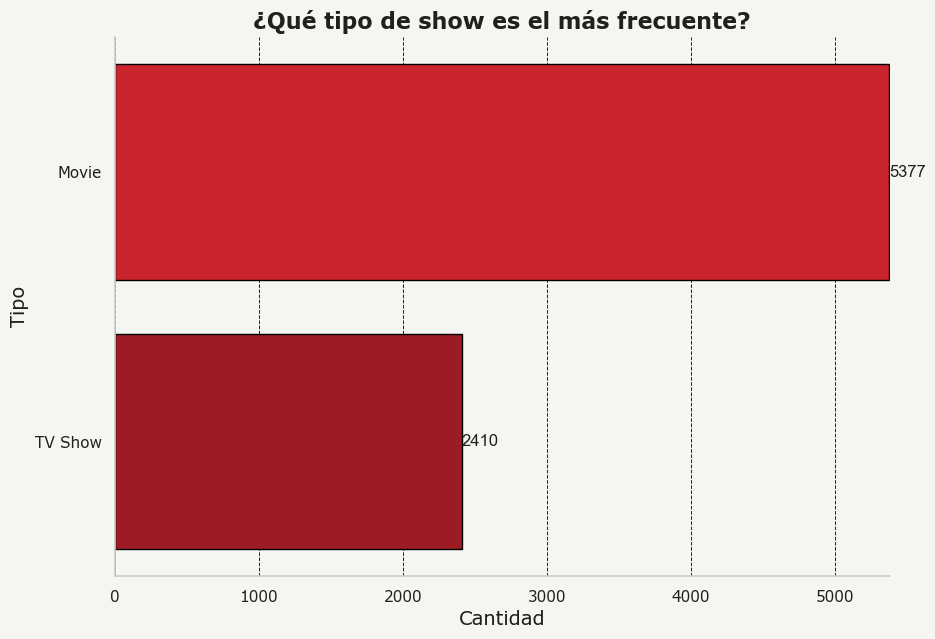

In [13]:
 

import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Cambia 'Roboto' por el nombre de la fuente que hayas instalado


# Contar las ocurrencias y ordenar
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
type_counts_sorted = type_counts.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(type_counts_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(10, 7), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='type', x='count',data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Cantidad', fontsize=14, color=text_color)
barplot.set_ylabel('Tipo', fontsize=14, color=text_color)
barplot.set_title('¿Qué tipo de show es el más frecuente?', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(type_counts_sorted['count']):
    plt.text(value + 1, index, f'{value}', va='center', fontsize=12, color=text_color)

# Añadir un margen al final de las barras
plt.xlim(0, type_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

ruta_directorio = './graficos'
ruta_grafico = os.path.join(ruta_directorio, 'tipo de show mas frecuente.png')
plt.savefig(ruta_grafico)

# Mostrar el gráfico
plt.show()


# 2. ¿En qué año se produjeron más películas y series?

## Top 10 años con más peliculas y series

C:\Users\marco\AppData\Local\Temp\ipykernel_21784\876388490.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




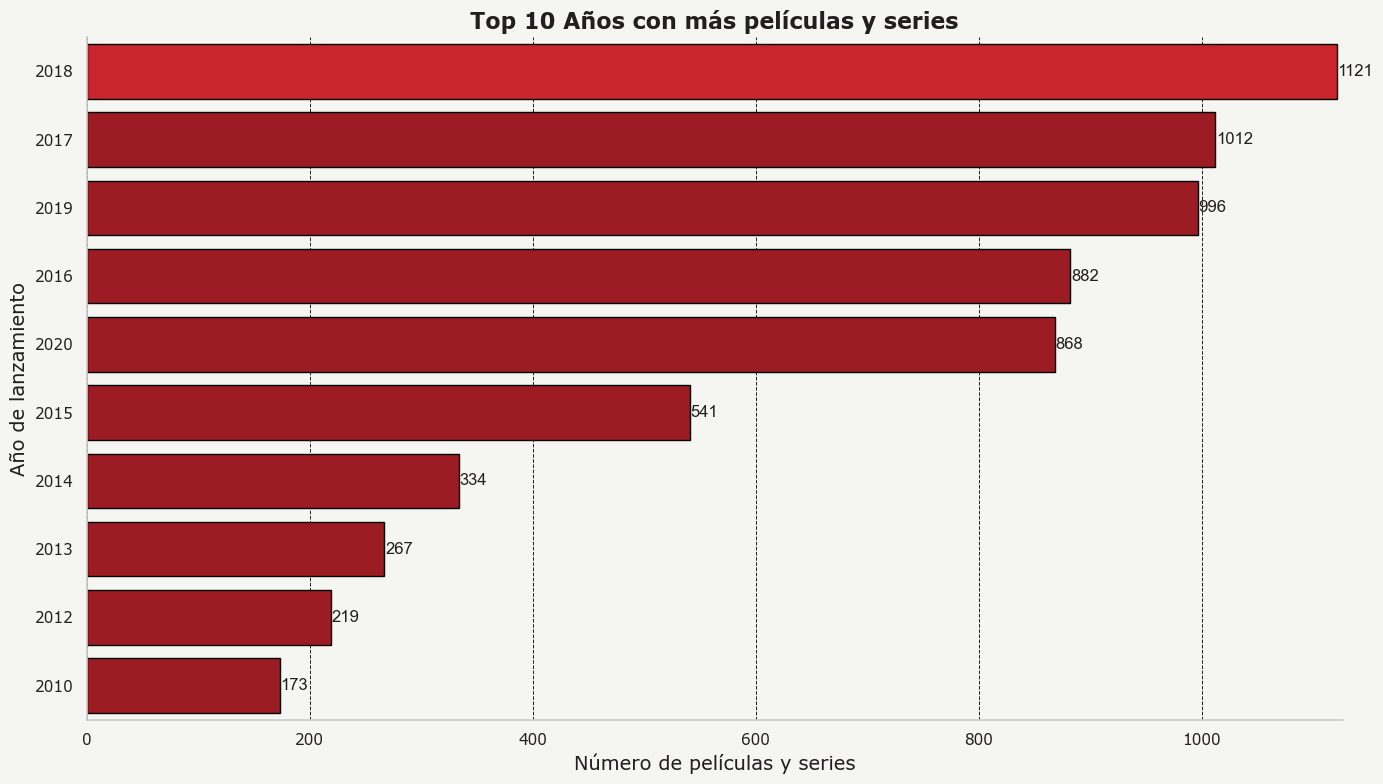

In [14]:

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Contar el número de películas por año
year_counts = df['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']

# Ordenar por el número de películas y obtener los 10 años con más películas
year_counts_sorted = year_counts.sort_values(by='count', ascending=False).head(10)

# Aplicar el color rojo brillante al año con más películas
max_count = year_counts_sorted['count'].max()

# Crear paleta de colores donde el año con más películas tiene el color rojo brillante
colors = [bright_red if count == max_count else dark_red for count in year_counts_sorted['count']]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Graficar las barras, utilizando `order` para asegurar que respete el orden del DataFrame
barplot = sns.barplot(
    y='release_year', 
    x='count', 
    data=year_counts_sorted, 
    palette=colors, 
    edgecolor="black", 
    orient='h',
    order=year_counts_sorted['release_year']  # Asegura el orden en el gráfico
)

# Personalizar etiquetas y título
barplot.set_xlabel('Número de películas y series', fontsize=14, color=text_color)
barplot.set_ylabel('Año de lanzamiento', fontsize=14, color=text_color)
barplot.set_title('Top 10 Años con más películas y series', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(year_counts_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12, color=text_color, ha='left')

# Añadir un margen al final de las barras
plt.xlim(0, year_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

ruta_directorio = './graficos'
ruta_grafico = os.path.join(ruta_directorio, 'Top10aniosMayorProduccion.png')
plt.savefig(ruta_grafico)

# Mostrar el gráfico
plt.show()



## Evolución con más peliculas y series

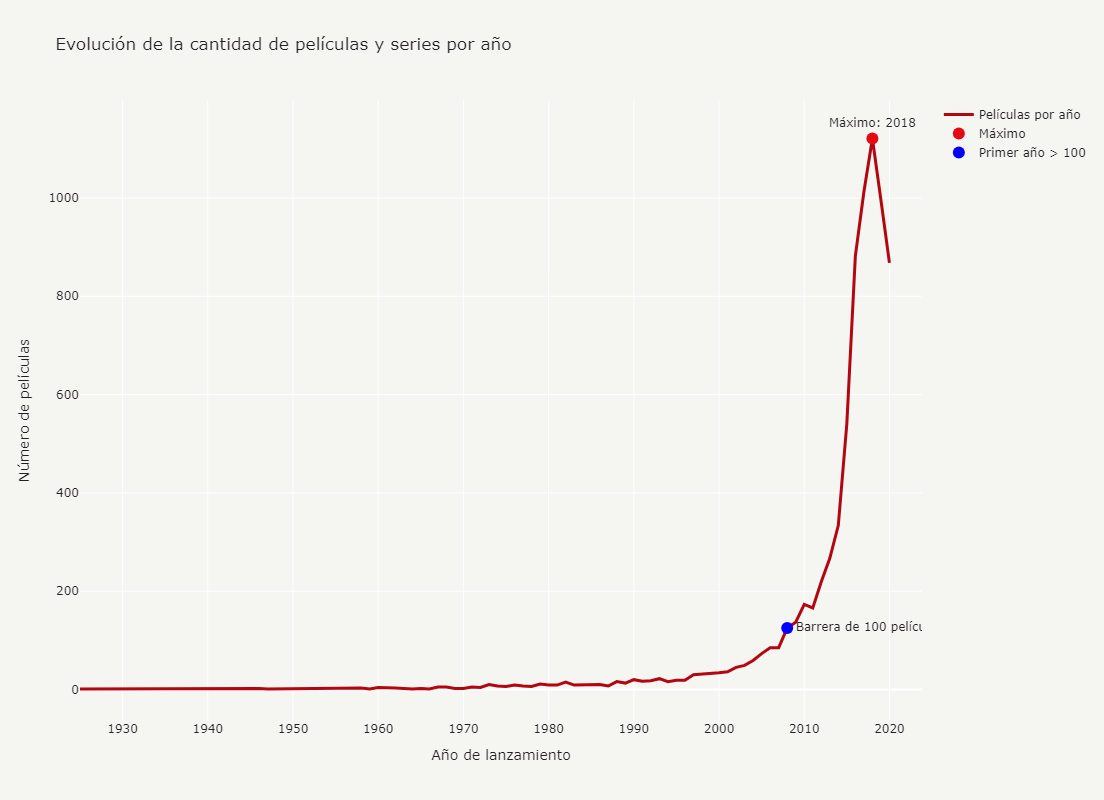

In [15]:

import plotly.graph_objects as go
import pandas as pd

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para resaltar
dark_red = '#b20710'    # Rojo oscuro para la línea principal
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

# Contar el número de películas por año
year_counts = df['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']

# Ordenar por año
year_counts_sorted = year_counts.sort_values(by='release_year')

# Filtrar solo hasta el año 2020
year_counts_sorted = year_counts_sorted[year_counts_sorted['release_year'] <= 2020]

# Encontrar el valor máximo
max_year = year_counts_sorted.loc[year_counts_sorted['count'].idxmax(), 'release_year']
max_count = year_counts_sorted['count'].max()

# Filtrar los años donde hay más de 100 películas
years_above_100 = year_counts_sorted[year_counts_sorted['count'] > 100]

# Encontrar el primer año en el que se superaron las 100 películas
first_above_100_year = years_above_100.iloc[0]['release_year']
first_above_100_count = years_above_100.iloc[0]['count']

# Crear la gráfica con Plotly
fig = go.Figure()

# Agregar línea principal
fig.add_trace(go.Scatter(
    x=year_counts_sorted['release_year'], 
    y=year_counts_sorted['count'], 
    mode='lines',
    line=dict(color=dark_red, width=3),
    name='Películas por año'
))

# Resaltar el punto máximo
fig.add_trace(go.Scatter(
    x=[max_year], 
    y=[max_count], 
    mode='markers+text',
    text=[f'Máximo: {max_year}'],
    textposition="top center",
    marker=dict(color=bright_red, size=12),
    name='Máximo'
))

# Resaltar el primer año con más de 100 películas
fig.add_trace(go.Scatter(
    x=[first_above_100_year], 
    y=[first_above_100_count], 
    mode='markers+text',
    text=[f'Barrera de 100 películas: {first_above_100_year}'],
    textposition="middle right",
    marker=dict(color='blue', size=12, symbol='circle'),
    name='Primer año > 100'
))

# Configurar el gráfico
fig.update_layout(
    title='Evolución de la cantidad de películas y series por año',
    xaxis_title='Año de lanzamiento',
    yaxis_title='Número de películas',
    plot_bgcolor=background_color,
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    width=1100,  
    height=800
)

ruta_directorio = './graficos'
nombre_archivo_png = 'grafico_evolucion_anios.png'
ruta_completa_png = os.path.join(ruta_directorio, nombre_archivo_png)
fig.write_image(ruta_completa_png, engine='kaleido')

# Mostrar el gráfico
fig.show()



# 3. ¿Qué países aportan más películas y series de TV?

C:\Users\marco\AppData\Local\Temp\ipykernel_21784\1056032515.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




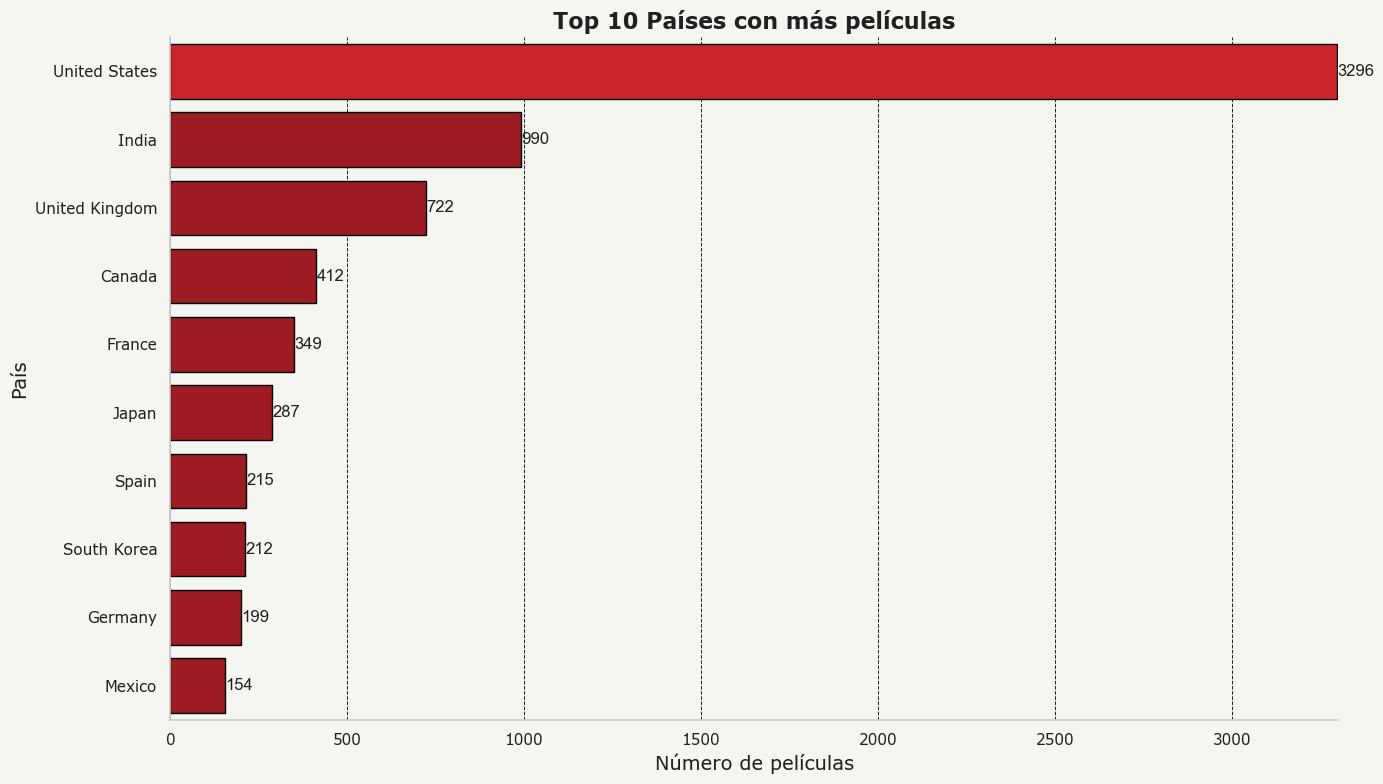

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los datos están en un DataFrame
# df = pd.read_csv('ruta_del_archivo.csv')  # Descomentar y ajustar según sea necesario

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada
df = df[df['country'] != '']

# Crear una lista de países, considerando que una película puede tener múltiples países
# Suponiendo que 'country' es una columna con listas de países separados por comas
countries = df['country'].str.split(', ', expand=True).stack()
country_counts = countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Ordenar por el número de películas y obtener los 10 países con más películas
country_counts_sorted = country_counts.sort_values(by='count', ascending=False).head(10)

# Aplicar el color rojo brillante al país con más películas
max_count = country_counts_sorted['count'].max()

# Crear paleta de colores donde el país con más películas tiene el color rojo brillante
colors = [bright_red if count == max_count else dark_red for count in country_counts_sorted['count']]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Graficar las barras, utilizando `order` para asegurar que respete el orden del DataFrame
barplot = sns.barplot(
    y='country', 
    x='count', 
    data=country_counts_sorted, 
    palette=colors, 
    edgecolor="black", 
    orient='h',
    order=country_counts_sorted['country']  # Asegura el orden en el gráfico
)

# Personalizar etiquetas y título
barplot.set_xlabel('Número de películas', fontsize=14, color=text_color)
barplot.set_ylabel('País', fontsize=14, color=text_color)
barplot.set_title('Top 10 Países con más películas', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(country_counts_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12, color=text_color, ha='left')

# Añadir un margen al final de las barras
plt.xlim(0, country_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

ruta_directorio = './graficos'
ruta_grafico = os.path.join(ruta_directorio, 'Top10PaisesMayorProduccion.png')
plt.savefig(ruta_grafico)

# Mostrar el gráfico
plt.show()


In [17]:
print(df['country'])

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7781                                        United States
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7280, dtype: object
